[1] Package import

In [181]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#sigmoid function
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))


[2] read data

In [182]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)

count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

[3] sort and calculate average image and calculate the result

In [183]:
arr = list_label.argsort()
sorted_list_label = list_label[arr]
sorted_list_image = list_image[:,arr]  

list_label = sorted_list_label
list_image = sorted_list_image

label = 0
label_num = [0] * 10  
average_array = np.zeros((784,10))  
result_array = np.zeros(10)  

theta = np.random.normal(size=784)

for i in range(len(list_label)):
    if(label == list_label[i]):
        label_num [label] = label_num[label] + 1
    else: 
        label = label +1
        label_num [label] = label_num[label] + 1

count = 0 
for i,l in enumerate(label_num):
    #calculate average image
    average_array[:,i]=np.mean(list_image[:,count:count+l],axis=1)
    
    #calculate average result
    result_array[i] = np.mean(sigmoid(np.dot(theta,list_image[:,count:count+l])))
    count = count + l

    

[4] Plot the average image

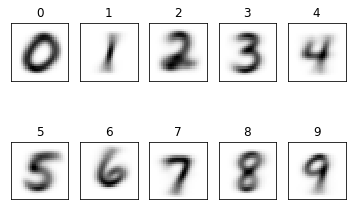

In [184]:
f1 = plt.figure(1)

for i in range(10):

    label       = i
    im_vector   = average_array[:,i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


[5] Present the output of the neural network with random weights

In [185]:
for i in range(len(result_array)):
    print("label : "+str(i) + "  result average : "+str(result_array[i])) 

label : 0  result average : 0.8418503986081303
label : 1  result average : 0.6699816964651836
label : 2  result average : 0.3064986703558315
label : 3  result average : 0.7000530511049452
label : 4  result average : 0.07332380232656603
label : 5  result average : 0.686107097541605
label : 6  result average : 0.3601494155332426
label : 7  result average : 0.15380256617760046
label : 8  result average : 0.4975345750848889
label : 9  result average : 0.11297559490948593
